In [2]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df= pd.read_csv('../data_analysis_with_python_and_pandas-master/data/raw_running_data.csv')

In [65]:
df.head()

,Date,Miles,Time
0,8/2/14,1.70,NaN
1,8/3/14,1.40,NaN
2,8/4/14,2.10,NaN
3,8/6/14,2.38,NaN
4,8/7/14,2.30,NaN


sanity checks: .columns and .index <-- are these what you'd expect?
right now no for the Date column which is currently read as an object

In [66]:
df= pd.read_csv('../data_analysis_with_python_and_pandas-master/data/raw_running_data.csv', parse_dates=['Date'])

In [67]:
df.Date.head()

0   2014-08-02
1   2014-08-03
2   2014-08-04
3   2014-08-06
4   2014-08-07
Name: Date, dtype: datetime64[ns]

while parse_dates tends to work well there are times (unclear when) the parameters will still need to be changed to ensure that the data is in dtype datatime 

In [68]:
# setting the dates as the index:
df.set_index('Date', inplace=True)
df.head()

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN


the go to plotting tool of pandas is matplotlib and it will default to a line plot for this dataset, for other datasets a bar, area, or density chart might be the default 
- if these are desired use df.plot(kind='bar/area/density')
- to change the axis use plt.xlabel(" ") and plt.ylabel(" ")

In [69]:
df

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


as we can see above this is a fairly large datset let's summarize and also specifiaclly look at one month of data 

In [70]:
df.describe()

,Miles
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [71]:
df['2014-12']

,Miles,Time
Date,,
2014-12-09,2.93,0:25:00
2014-12-12,1.37,0:09:15
2014-12-13,5.30,0:43:36
2014-12-13,2.21,0:18:59
2014-12-15,6.50,0:58:43
2014-12-17,12.00,1:39:00
2014-12-19,3.10,0:26:15
2014-12-20,14.80,2:15:00
2014-12-22,3.10,0:28:00


as we can see we don't have data for every day and some days have multiple entries, there are a few tools we will utlize to fill in these gaps

In [72]:
from datetime import datetime
start = datetime(2014,8,1)
end = datetime(2015,1,2)

In [73]:
start = df.index.min()
end = df.index.max()

either of the above methods work for setting a start and end date, and it coems down to personal preferance and what works best for the data set

In [74]:
d = pd.DataFrame(index=pd.date_range(start, end))
# d=pd.DataFrame(index=pd.date_range(pd.datetime(2014, 8,1) , pd.datetime(2015, 1,2))

In [75]:
d.head()

""
2014-08-02
2014-08-03
2014-08-04
2014-08-05
2014-08-06


In [76]:
d.tail()

""
2014-12-28
2014-12-29
2014-12-30
2014-12-31
2015-01-01


notice that all dates are filled in now! however, we still need to join the dates to the rest of the dataframe--  looking for full outer join there are two different ways to do this

In [77]:
d.join(df)

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


In [78]:
df.join(d, how='outer')

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


In [79]:
df = df.join(d, how='outer')

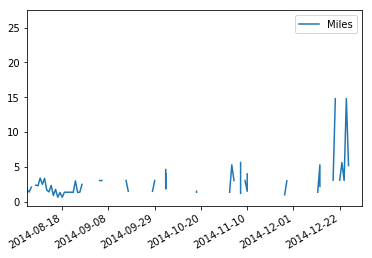

In [80]:
df.plot()

In [83]:
df.Miles

2014-08-02     1.70
2014-08-03     1.40
2014-08-04     2.10
2014-08-05     0.00
2014-08-06     2.38
2014-08-07     2.30
2014-08-08     3.40
2014-08-09     2.50
2014-08-10     3.36
2014-08-11     1.67
2014-08-12     1.42
2014-08-13     2.35
2014-08-14     0.90
2014-08-14     0.90
2014-08-15     1.78
2014-08-16     0.65
2014-08-17     1.34
2014-08-18     0.65
2014-08-19     1.37
2014-08-19     1.37
2014-08-20     1.37
2014-08-21     1.37
2014-08-22     1.37
2014-08-23     1.34
2014-08-24     3.00
2014-08-25     1.37
2014-08-25     1.34
2014-08-26     1.37
2014-08-27     2.50
2014-08-28     0.00
              ...  
2014-12-04     0.00
2014-12-05     0.00
2014-12-06     0.00
2014-12-07     0.00
2014-12-08     0.00
2014-12-09     2.93
2014-12-10     0.00
2014-12-11     0.00
2014-12-12     1.37
2014-12-13     5.30
2014-12-13     2.21
2014-12-14     0.00
2014-12-15     6.50
2014-12-16     0.00
2014-12-17    12.00
2014-12-18     0.00
2014-12-19     3.10
2014-12-20    14.80
2014-12-21     0.00


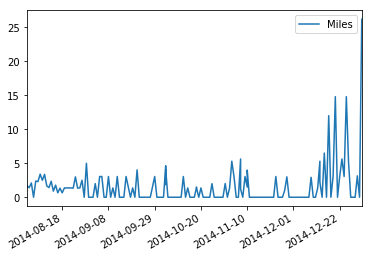

In [85]:
df.plot()

In [87]:
df.to_csv('../data_analysis_with_python_and_pandas-master/data/date_fixed_running_data.csv')